In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
NUM_EPOCHS = 50 #Количество эпох.
BATCH_SIZE = 128 #Количество подаваемых за раз картинок 
LEARNING_RATE = 0.001#Шаг

In [3]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [4]:
#выводим размерность и тип данных
print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

(60000, 28, 28) uint8
(10000, 28, 28) uint8
(60000,) uint8
(10000,) uint8


In [5]:
#меняем размерность 
train_x = train_x.reshape(-1, 28, 28, 1).astype(np.float32)/255.
test_x = test_x.reshape(-1, 28, 28, 1).astype(np.float32)/255.
train_y = train_y.astype(np.int32)
test_y = test_y.astype(np.int32)

In [6]:
#выводим новую размерность и тип данных
print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

(60000, 28, 28, 1) float32
(10000, 28, 28, 1) float32
(60000,) int32
(10000,) int32


In [7]:
#берем 100 картинок из dataset 
test_samples = train_x[:100,...]
print(test_samples.shape)

(100, 28, 28, 1)


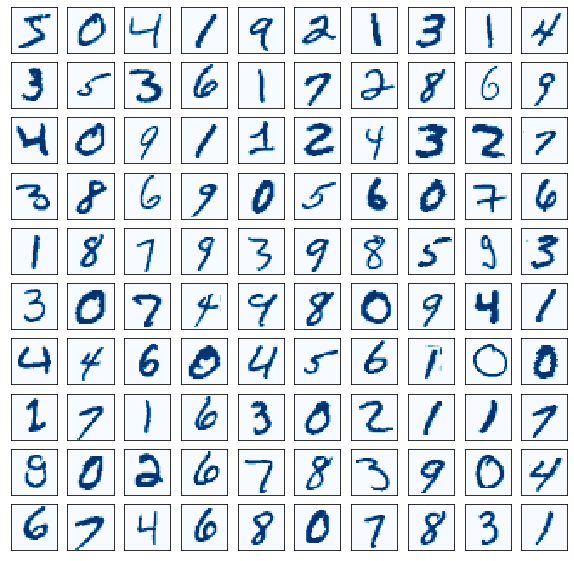

In [8]:
fig = plt.figure(figsize=(10, 10))
#выводим 100 картинок из dataset
for j in range(test_samples.shape[0]):
  ax = fig.add_subplot(10, 10, j + 1)
  ax.imshow(test_samples[j,:,:,0], cmap='Blues')
  plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(buffer_size = train_x.shape[0])
train_ds = train_ds.repeat(NUM_EPOCHS)
train_ds = train_ds.batch(BATCH_SIZE)

In [10]:
from tensorflow.keras import layers
#Создаем свою модель сети.
class Net(tf.keras.Model):
  #Конструктор сети.
  def __init__(self):
    super(Net, self).__init__()
    self.Conv1 = layers.Conv2D(32, (5, 5), activation= tf.nn.relu, padding= 'same')
    self.Conv2 = layers.Conv2D(64, (5, 5), activation= tf.nn.relu, padding= 'same')
    self.Fc1 = layers.Dense(256, activation= tf.nn.sigmoid)
    self.Fc2 = layers.Dense(10, activation= tf.nn.softmax)
    self.MaxPooling = layers.MaxPooling2D((2, 2), (2,2), padding = 'same')
  #Функция вызова сети.
  def __call__(self, inp):
    out = self.Conv1(inp)
    out = self.MaxPooling(out)
    out = self.Conv2(out)
    out = self.MaxPooling(out)
    out = tf.compat.v1.layers.flatten(out)
    out = self.Fc1(out)
    out = self.Fc2(out)
    return out

In [11]:
model = Net()

In [12]:

# функция потерь.
def loss(logits, labels):
  return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels))

#Вычисление точности.
def accuracy(logits, labels):
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  return tf.reduce_mean(tf.cast(tf.equal(prediction, labels), dtype=tf.float32))

In [13]:

#Уоптимизатор и глобальный шаг.
optimizer = tf.compat.v1.train.AdamOptimizer(LEARNING_RATE)
global_step = tf.compat.v1.train.get_or_create_global_step()

In [14]:
for(images, labels) in train_ds:
  #Прямое распространение
  with tf.GradientTape() as tape:
    logits = model(images)
    loss_value = loss(logits, labels)
  
  #Обратное распространение
  grads = tape.gradient(loss_value, model.variables)
  optimizer.apply_gradients(zip(grads, model.variables),global_step= global_step)

  if global_step.numpy() % 200 == 0:
    test_logits = model(test_x[:512,...])
    accuracy_value = accuracy(test_logits, test_y[:512,...])
    print(f"[{global_step.numpy()}] Accuary {accuracy_value.numpy()*100}")

Instructions for updating:
Use keras.layers.Flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
[200] Accuary 96.2890625
[400] Accuary 98.046875
[600] Accuary 98.828125
[800] Accuary 98.4375
[1000] Accuary 99.0234375
[1200] Accuary 99.0234375
[1400] Accuary 99.0234375
[1600] Accuary 99.4140625
[1800] Accuary 99.4140625
[2000] Accuary 99.609375
[2200] Accuary 99.0234375
[2400] Accuary 99.4140625
[2600] Accuary 99.0234375
[2800] Accuary 99.609375
[3000] Accuary 99.609375
[3200] Accuary 99.8046875
[3400] Accuary 99.0234375
[3600] Accuary 99.4140625
[3800] Accuary 99.8046875
[4000] Accuary 100.0
[4200] Accuary 99.4140625
[4400] Accuary 99.8046875
[4600] Accuary 99.4140625
[4800] Accuary 99.609375
[5000] Accuary 99.4140625
[5200] Accuary 99.21875
[5400] Accuary 100.0
[5600] Accuary 99.609375
[5800] Accuary 99.4140625
[6000] Accuary 99.4140625
[6200] Accuary 99.4140625
[6400] Accuary 99.0234375
[6600] Accuary 99.609375
[6800] Accuary 99.609375
[7000] Accua

In [15]:
#Смотрим итоговую точность 
test_logits = model(test_x)
accuracy_value = accuracy(test_logits, test_y).numpy()
print(f"Final Acc: {accuracy_value*100}%")

Final Acc: 99.26999807357788%


In [16]:
def test_digit(sample):
  sample = sample[np.newaxis,...]
  logits = model(sample)
  prediction = tf.nn.softmax(logits)
  ans = np.argmax(prediction)

  fig = plt.figure(figsize=(12, 4))
  ax = fig.add_subplot(1, 2, 1)
  ax.imshow(sample[0,:,:,0], cmap= 'Blues')
  plt.xticks([]), plt.yticks([])

  ax = fig.add_subplot(1, 2, 2)
  bar_list = ax.bar(np.arange(10), prediction[0], align='center')
  bar_list[ans].set_color('g')
  ax.set_xticks(np.arange(10))
  ax.set_xlim([-1, 10])
  ax.grid(True)

  plt.show()
  print(f"Predicted {ans}")

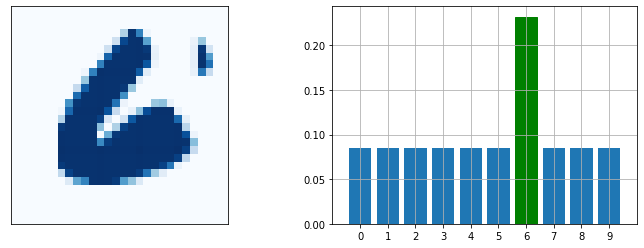

Predicted 6
True answer 6


In [17]:
#Смотрим результат обучения на рандомной картинке 
import random as rnd

idx = rnd.randint(0, test_x.shape[0])
sample = test_x[idx,...]
test_digit(sample)

print(f"True answer {test_y[idx]}")